Milestone 1: Data Understanding & Exploration
- Load the diabetes dataset using scikit-learn and display the first five rows
- Perform descriptive statistics (mean, median, min, max) and summarize class balance
- Visualize the distributions of at least two features using histograms or box plots

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load Diabetes dataset
diabetes = load_diabetes(as_frame=True)
df_diabetes = diabetes.frame
print("\nDiabetes Dataset:")
print(df_diabetes.head())



Diabetes Dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


Milestone 2: Data Preparation & Preprocessing
- Handle any missing values, duplicates, or outliers in the dataset
- Apply feature scaling/normalization
- Encode categorical variables (if present) with a suitable technique
- Perform basic correlation analysis and point out highly correlated features

Milestone 3: Model Selection & Training
- Split the dataset into training and test sets with a suitable ratio
- Choose and train at least two machine learning models (e.g., logistic regression, random forest)
- Include hyperparameter tuning with cross-validation for one chosen model

Milestone 4: Model Evaluation & Interpretation
- Evaluate the trained models with appropriate metrics (accuracy, ROC-AUC, precision, recall)
- Plot and interpret a confusion matrix for the best model

Milestone 5: Deployment & Reporting
- save your final trained model for later use
- load the model and making a new prediction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [4]:
#  descriptive statistics
print(df_diabetes.describe().loc[['mean', '50%', 'min', 'max']])

               age           sex           bmi            bp            s1  \
mean -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
50%   5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
min  -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
max   1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                s2            s3            s4            s5            s6  \
mean  3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
50%  -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
min  -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
max   1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

          target  
mean  152.133484  
50%   140.500000  
min    25.000000  
max   346.000000  


In [5]:
# Class Imbalance Check
median_target = df_diabetes['target'].median()
df_diabetes['class'] = (df_diabetes['target'] > median_target).astype(int)

In [6]:
counts = df_diabetes['class'].value_counts().sort_index()
percent = (df_diabetes['class'].value_counts(normalize=True) * 100).round(2).sort_index()

balance_df = pd.DataFrame({
    'Count': counts,
    'Percentage': percent.astype(str) + '%'
})

print("\n=== Class Balance (median split) ===")
display(balance_df)


=== Class Balance (median split) ===


,Count,Percentage
class,,
0,221,50.0%
1,221,50.0%


<Figure size 1400x600 with 0 Axes>

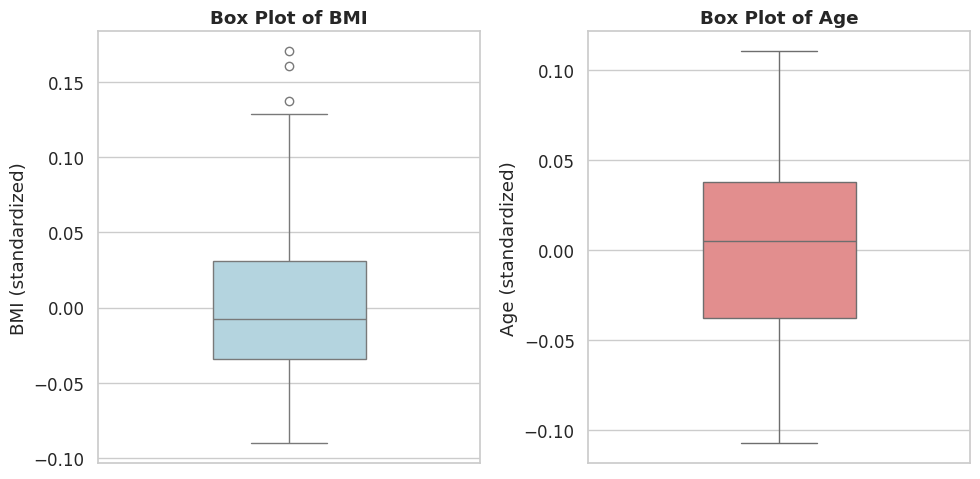

In [7]:
# Visualize the distributions of at least two features using histograms or box plots
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(14, 6))

#  Box Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_diabetes['bmi'], color='lightblue', width=0.4)
plt.title('Box Plot of BMI', weight='bold')
plt.ylabel('BMI (standardized)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_diabetes['age'], color='lightcoral', width=0.4)
plt.title('Box Plot of Age', weight='bold')
plt.ylabel('Age (standardized)')

plt.tight_layout()
plt.show()


In [8]:
# Data Preparation & Preprocessing
df_diabetes.shape

(442, 12)

In [9]:
# Handle any missing values, duplicates, or outliers in the dataset
df_diabetes.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [10]:
df_diabetes.duplicated().sum()

np.int64(0)

In [11]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers, lower, upper

In [12]:
for col in ['bmi', 'age']:
    outliers, lower, upper = detect_outliers_iqr(df_diabetes, col)
    print(f"  {col}: {len(outliers)} outliers (outside [{lower:.3f}, {upper:.3f}])")

  bmi: 3 outliers (outside [-0.132, 0.129])
  age: 0 outliers (outside [-0.150, 0.151])


In [13]:
# feature scaling/normalization
from sklearn.preprocessing import StandardScaler

In [14]:
feature_cols = df_diabetes.columns.drop('target')
scaler = StandardScaler()


In [15]:
df_scaled = df_diabetes.copy()
df_scaled[feature_cols] = scaler.fit_transform(df_diabetes[feature_cols])

In [16]:
print("After Standard Scaling (first 5 rows):")
display(df_scaled.head())

After Standard Scaling (first 5 rows):


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,class
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,151.0,1.0
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,75.0,-1.0
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,141.0,1.0
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,206.0,1.0
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,135.0,-1.0


In [17]:
# Encode categorical variables (if present) with a suitable technique
df_diabetes.select_dtypes(include=['object', 'category']).columns

Index([], dtype='object')

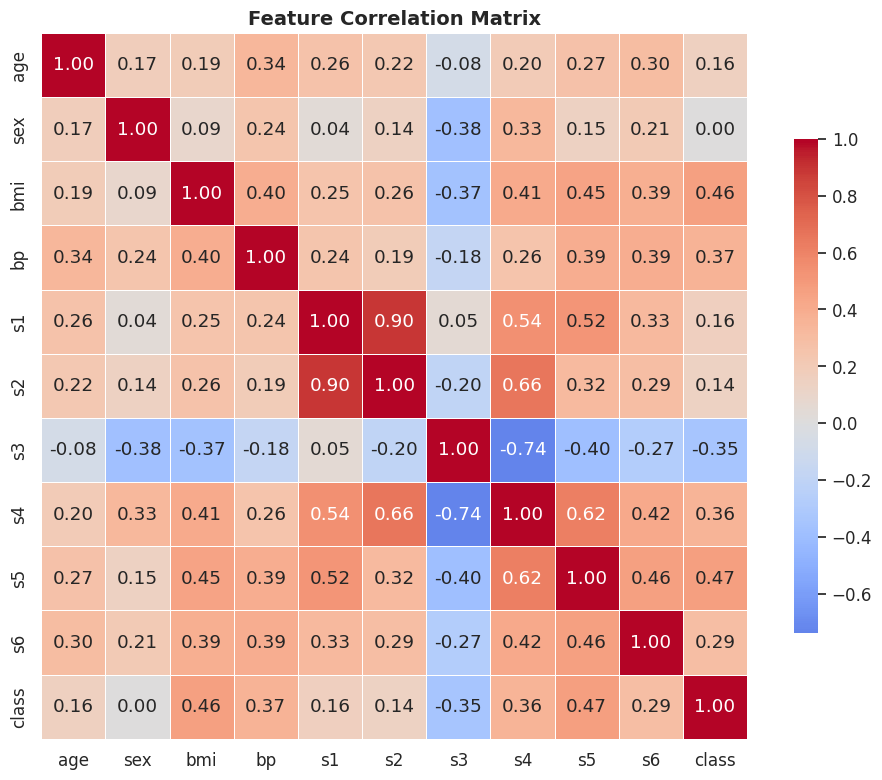

In [18]:
# Perform basic correlation analysis and point out highly correlated features
plt.figure(figsize=(10, 8))
corr = df_scaled[feature_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.title("Feature Correlation Matrix", weight='bold', size=14)
plt.tight_layout()
plt.show()

In [19]:
print("\nHighly correlated feature pairs (|r| > 0.7):")
high_corr = corr.abs().unstack()
high_corr = high_corr[high_corr.between(0.7, 1, inclusive='neither')]
high_corr = high_corr.drop_duplicates().sort_values(ascending=False)

if not high_corr.empty:
    for (f1, f2), r in high_corr.items():
        print(f"  {f1} — {f2}: {r:.3f}")
else:
    print("  None found.")


Highly correlated feature pairs (|r| > 0.7):
  s1 — s2: 0.897
  s3 — s4: 0.738


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df_diabetes.drop('target', axis=1)
y = df_diabetes['target']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set:     {X_test.shape[0]} samples")

Training set: 353 samples
Test set:     89 samples


In [23]:

from sklearn.linear_model import LinearRegression

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"   MSE:  {mse_lr:.2f}")
print(f"   R²:   {r2_lr:.3f}")

Linear Regression Results:
   MSE:  1112.20
   R²:   0.790


In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print(f"   MSE:  {mse_rf:.2f}")
print(f"   R²:   {r2_rf:.3f}")

Random Forest Results:
   MSE:  1166.87
   R²:   0.780


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [29]:
ridge = Ridge()
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 50.0, 100.0, 500.0]
}

grid_search = GridSearchCV(
    ridge, param_grid, cv=5, scoring='r2', n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV R² score: {:.3f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.1}
Best CV R² score: 0.752


In [30]:
best_ridge = grid_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nTuned Ridge Regression (Test Set):")
print(f"   MSE:  {mse_ridge:.2f}")
print(f"   R²:   {r2_ridge:.3f}")


Tuned Ridge Regression (Test Set):
   MSE:  1064.97
   R²:   0.799


In [31]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

In [32]:
# Binarize target for classification
median_target = df_diabetes['target'].median()
y_binary = (df_diabetes['target'] > median_target).astype(int)

# Split with binarized target
X_train, X_test, y_train_bin, y_test_bin = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Keep continuous for regression
y_train_cont = df_diabetes.loc[X_train.index, 'target']
y_test_cont = df_diabetes.loc[X_test.index, 'target']

In [33]:
# Normalize predictions to [0,1] for probability-like scores
def normalize_to_proba(y_pred):
    y_pred = np.array(y_pred).ravel()  # ensure 1D
    y_min, y_max = y_pred.min(), y_pred.max()
    if y_max == y_min:
        return np.full_like(y_pred, 0.5)  # neutral
    return (y_pred - y_min) / (y_max - y_min)

# Apply safely
y_pred_lr_proba = normalize_to_proba(y_pred_lr)
y_pred_rf_proba = normalize_to_proba(y_pred_rf)

# Convert to class labels
y_pred_lr_class = (y_pred_lr_proba >= 0.5).astype(int)
y_pred_rf_class = (y_pred_rf_proba >= 0.5).astype(int)

In [36]:

# Classification Metrics

models_eval = {
    "Linear Regression": (y_pred_lr_class, y_pred_lr_proba),
    "Random Forest": (y_pred_rf_class, y_pred_rf_proba)
}

results = []
for name, (y_pred_class, y_pred_proba) in models_eval.items():
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test_bin, y_pred_class),
        'Precision': precision_score(y_test_bin, y_pred_class, zero_division=0),
        'Recall': recall_score(y_test_bin, y_pred_class, zero_division=0),
        'F1-Score': f1_score(y_test_bin, y_pred_class, zero_division=0),
        'ROC-AUC': roc_auc_score(y_test_bin, y_pred_proba)
    })

results_df = pd.DataFrame(results).round(4)
results_df = results_df.sort_values('ROC-AUC', ascending=False)
print("\nClassification Metrics (Binary via Median Split):")
display(results_df)


Classification Metrics (Binary via Median Split):


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Linear Regression,0.5169,0.5128,0.4545,0.4819,0.5217
1,Random Forest,0.5056,0.5000,0.4545,0.4762,0.5098


In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
best_name = results_df.iloc[0]['Model']
y_best_pred = y_pred_rf_class if best_name == "Random Forest" else y_pred_lr_class

In [39]:
cm = confusion_matrix(y_test_bin, y_best_pred)

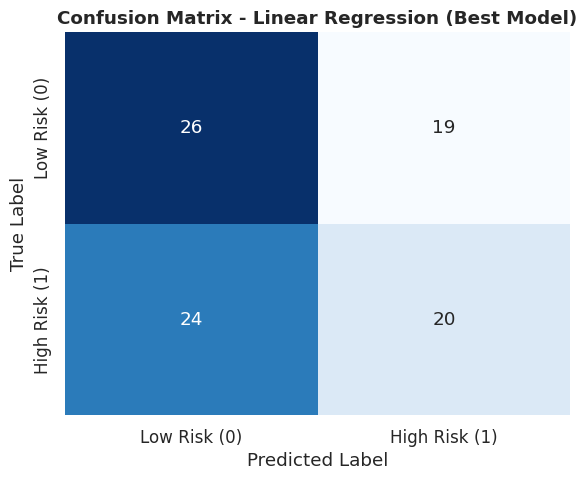

In [40]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low Risk (0)', 'High Risk (1)'],
            yticklabels=['Low Risk (0)', 'High Risk (1)'])
plt.title(f'Confusion Matrix - {best_name} (Best Model)', weight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [41]:
print(f"\nClassification Report ({best_name}):")
print(classification_report(y_test_bin, y_best_pred,
                          target_names=['Low Risk', 'High Risk']))


Classification Report (Linear Regression):
              precision    recall  f1-score   support

    Low Risk       0.52      0.58      0.55        45
   High Risk       0.51      0.45      0.48        44

    accuracy                           0.52        89
   macro avg       0.52      0.52      0.51        89
weighted avg       0.52      0.52      0.52        89



In [45]:
print("\nInterpretation:")
tn, fp, fn, tp = cm.ravel()
print(f"  • True Negatives (TN): {tn}  → Correctly predicted Low Risk")
print(f"  • False Positives (FP): {fp} → Predicted High Risk, but actually Low")
print(f"  • False Negatives (FN): {fn} → Predicted Low Risk, but actually High → Critical in healthcare!")
print(f"  • True Positives (TP): {tp}  → Correctly predicted High Risk")
print(f"\n  • Recall (sensitivity): {tp/(tp+fn):.2%}")
print(f"  • Precision: {tp/(tp+fp):.2%} → Of predicted High Risk")


Interpretation:
  • True Negatives (TN): 26  → Correctly predicted Low Risk
  • False Positives (FP): 19 → Predicted High Risk, but actually Low
  • False Negatives (FN): 24 → Predicted Low Risk, but actually High → Critical in healthcare!
  • True Positives (TP): 20  → Correctly predicted High Risk

  • Recall (sensitivity): 45.45%
  • Precision: 51.28% → Of predicted High Risk
